In [209]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
from firebase_admin import db

if not firebase_admin._apps:
    cred = credentials.Certificate("gait-analysis-7350b-firebase-adminsdk-czbst-e609643d68.json")
    firebase_admin.initialize_app(cred,{'databaseURL':'https://gait-analysis-7350b-default-rtdb.asia-southeast1.firebasedatabase.app/230128_jihun'})



In [210]:
import numpy as np
import pandas as pd


def setData(df):
    dict = {}

    dict.update({'Roll' : df['Roll'].values.tolist()})
    dict.update({'Pitch' : df['Pitch'].values.tolist()})
    dict.update({'Yaw' : df['Yaw'].values.tolist()})
    dict.update({'Time' : df['Time'].values.tolist()})

    name = input()
    new_dir = db.reference(name)
    new_dir.update(dict)
    
    clear = db.reference("input")
    clear.delete()    
    
    
    
def getData():    
    filename = input()
    dir = db.reference(filename) #데이터베이스에 저장되어있는 데이터 이름
    data = dir.get()
    
    dir = db.reference()
    
    data_list = np.concatenate(data).tolist()
    
    for i in range(0,len(data_list)):
        data_list[i] = data_list[i].split(',')
    
    
    df = pd.DataFrame(data_list)
    df.columns = ['Roll','Pitch','Yaw','Time']
    df = df.astype('float') 

    df['Time'] = df['Time'].apply(lambda x: x/1000)
    first_time = df['Time'].loc[0]
    df['Time'] = df['Time'].apply(lambda x: x-first_time)
    
    df = df.loc[200:,:]
    
    return df



In [211]:
df = getData()
# 

TypeError: The first input argument needs to be a sequence

In [205]:
import matplotlib.pyplot as plt

def draw_plot(df, name):
    x = df['Time']
    
    f, axes = plt.subplots(3,1)
    # 격자 크기 설정
    f.set_size_inches((10, 10))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    plt.title(name + "'s Gait")

    axes[0].plot(x, df['Roll'])
    axes[0].set_title('Roll')
    
    axes[1].plot(x, df['Pitch'])
    axes[1].set_title('Pitch')

    axes[2].plot(x, df['Yaw'])
    axes[2].set_title('Yaw')

    plt.show()

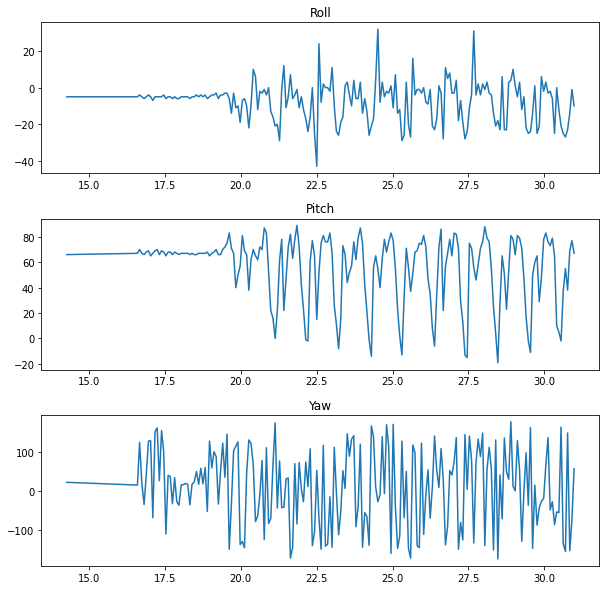

In [206]:
draw_plot(df,"")